# Numerical solution of the 1d heat equation with forward Euler

\begin{align*}
\begin{cases}
  u_t=u_{xx}, \qquad a < x < b,\; 0\leq t \leq T \\[0.2cm]
  u(a,t)=g_a(t),\quad u(b,t)=g_b(t),\\[0.2cm]
  u(x,0) = u_0(x)&
  \end{cases}
\end{align*}

using the Forward Euler method. To simplify, we take $a=0$ and $b=1$.

## Code to solve the problem

* Import libraries

In [14]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

* Function to construct tridiagonal matrices

In [15]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

In [16]:
class IBVP(object): 
    def __init__(self, ga=0, gb=0, a=0, b=1, u0=0, f=0):
        self.ga = ga       # left boundary condition
        self.gb = gb       # right boundary condition
        self.a = a         # left boundary position 
        self.b = b         # right boundary position 
        self.u0 = u0       # initial condition
        self.f = f         # right hand side 

* Implement the solver. 

In [17]:
def forward_euler(IBVP, M=10, N=100, T=0.5):
    # Solve the heat equation
    # u_t=u_xx, a<=x<=b
    # and initial values u(x,0)=u0(x)
    # over the time interval from 0 to T.
    # Input: 
    #       IBVP: object with the initial and boundary values and right hand side 
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    # Set the stepsizes
    h = (IBVP.b-IBVP.a)/M     # Stepsize in space
    k = T/N                   # Stepsize in time
    
    r = k/h**2
    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}, r={:.4f}'.format(h,k,r))
    
    x = np.linspace(IBVP.a, IBVP.b, M+1)  # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)              # Gridpoints on the t-axis   
    U = np.zeros((M+1,N+1))               # Array to store the solution, boundaries included. 
    
    U[:,0] = IBVP.u0(x)                   # Initial values
    U[0,:] = IBVP.ga(t)                   # Boundary values
    U[-1,:] = IBVP.gb(t)                  # Boundary values
    
    A = tridiag(r,1-2*r,r,M-1);
    

    # Main loop (only correct for 0=ga=gb=f)
    for n in range(N):
         U[1:-1, n+1] = A.dot(U[1:-1,n])  
               # Must add BC and RHS-terms if BC and RHS not 0
        
    return x, t, U

* Implement the plotting function

In [18]:
def plot_solution(x, t, U, txt='Solution'):
    # Plot the solution of the heat equation
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    T, X = np.meshgrid(t,x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)              # Rotate the figure
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(txt);

## Run a numerical test

In [19]:
def u0(x): #Initial condition 
    return (np.heaviside(x-0.4,1)-np.heaviside(x-0.7,1))

def g0(t): #Boundary value x=0 (Alternative syntax: g0 = lambda t: t*0) 
    return 0

def g1(t): #Boundary value x=1
    return 0

* Solve it. 
* Plot the solution.

h=0.0500, k=0.0013, r=0.5000


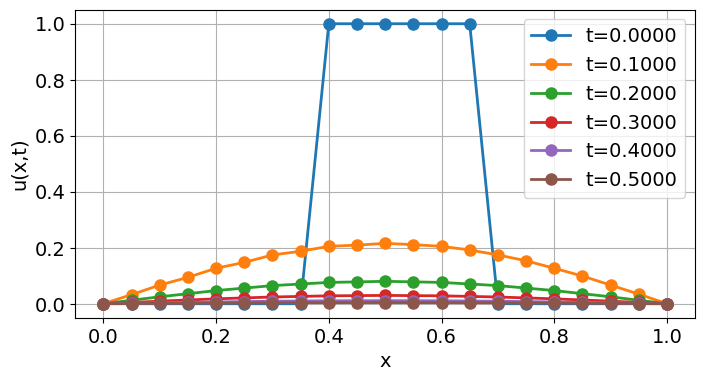

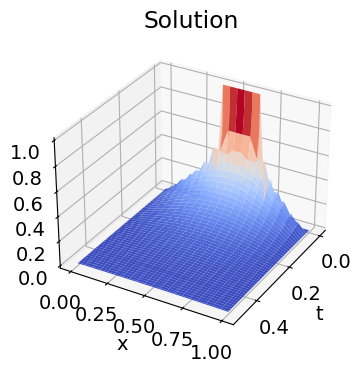

In [20]:
ex1 = IBVP(g0,g1,0,1,u0,0)

# Solve the problem
x, t, U = forward_euler(ex1, M=20, N=400, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.4f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

## Test accuracy of solver. Exact solution.
Since we can find many exact solution by the method of sparation of variables, we will use one of these:
\begin{align}
    u(x,t)=e^{-\pi^2 t}\sin(\pi x) + e^{-4\pi^2 t}\sin(2\pi x)
\end{align}
with initial condition 
\begin{align*}
    f(x)&=\sin(\pi x) + \sin(2\pi x) 
\end{align*}

In [21]:
# Exact solution:
def uex_1(x,t):  
    return  np.exp(-1*np.pi**2*t)*np.sin(np.pi*x) + np.exp(-4*np.pi**2*t)*np.sin(2*np.pi*x)

#Initial condition: 
def u0(x): 
    return np.sin(np.pi*x) + np.sin(2*np.pi*x)

h=0.0500, k=0.0013, r=0.5000


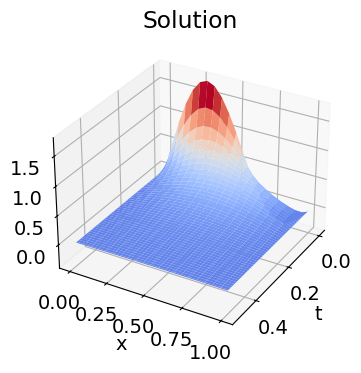

In [22]:
# Solve the equation
ex2 = IBVP(g0,g1,0,1,u0,0)
x, t, U = forward_euler(ex2, M=20, N=400, T=0.5) 


# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

* Plot the error

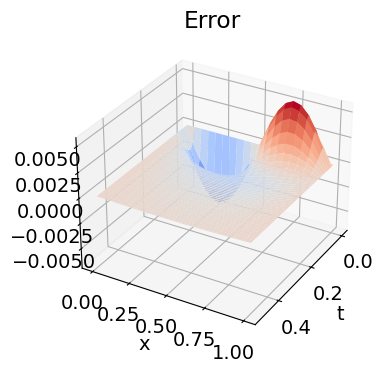

In [23]:
# Make a 3-d plot of the error
T, X = np.meshgrid(t,x)
plot_solution(x, t, U-uex_1(X,T), txt='Error')
plt.show()

#### Convergence in space
* We measure convergence in the max / $L^\infty$-norm
* Verify the convergence rate in space by successively refining the spatial grid, keeping the timestep fixed and very/sufficiently small (the CFL condition must always be satisfied).
* For simplicity we compute the error at a fixed time (so we compute the max-norm in space only). We take an early time because solution decay to zero exponentially.

In [24]:
def convergence_space(u_exact,heat_object, solver=forward_euler): 
    P = 4
    Hconv = np.zeros(P)
    Econv = np.zeros(P)
    M = 4
    for p in range(P):
        x, t, U = solver(heat_object, M=M, N=10000, T=0.1)
        Eh = u_exact(x,t[-1])-U[:,-1]
        Hconv[p] = (x[1]-x[0])
        Econv[p] = np.max(np.abs(Eh))
        M = 2*M
    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0]
    return Hconv, Econv, order

* Make a table of step sizes and corresponding errors, compute the local rates.

In [25]:
H, E, p = convergence_space(uex_1,ex2)
import pandas as pd #To format the output of the notebook.  
Rate=np.zeros(np.size(E))
Rate[1:]=np.log10(E[1:]/E[:-1])/np.log10(H[1:]/H[:-1])
pd.options.display.float_format = '{:.8f}'.format
df = pd.DataFrame(data={'h': H, 'Error': E ,'Rate':Rate}) 
df

h=0.2500, k=0.0000, r=0.0002
h=0.1250, k=0.0000, r=0.0006
h=0.0625, k=0.0000, r=0.0026
h=0.0312, k=0.0000, r=0.0102


ModuleNotFoundError: No module named 'pandas'

* Plot the log-log graph of convergence in space.

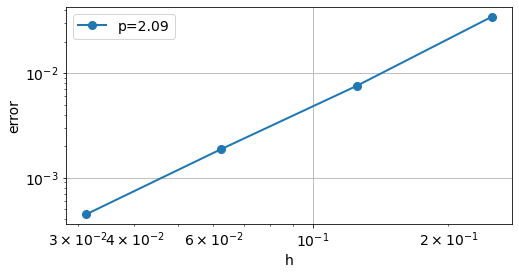

In [ ]:
plt.loglog(H,E,'o-', label='p={:.2f}'.format(p))
plt.grid('on')
plt.xlabel('h')
plt.ylabel('error')
plt.legend();

#### Convergence in time
* Verify the convergence rate in time by successively refining the temporal grid. 
* Because of the CFL stability condition $k<0.5h^2$, we can never take very small $h$ and then refine $k$. 
* We change test problem: Fix $h$ and consider the semi-discrete  problem $\partial_tu_m=\frac1{h^2}\delta_h^2u_m$.
* We have no exact solution, but instead compute a very accurate reference solution with our finite difference solver by taking $k$ very small.
* The reference solution replaces the exact solution and we can refine $k$ and compute errors and rates as before.

In [ ]:
# Find reference solution for semidiscrete problem (h fixed)
x, t, U_ref = forward_euler(ex2, M=20, N=50000, T=0.1)

# Refine in time
def convergence_time(U_ref, heat_object,solver=forward_euler): 
    P = 4
    Tconv = np.zeros(P)
    Econv = np.zeros(P)
    N = 400
    for p in range(P):
        x, t, U = solver(heat_object, M=20, N=N, T=0.1)
        Eh = U_ref[:,-1]-U[:,-1]
        Tconv[p] = (t[1]-t[0])
        Econv[p] = np.max(np.abs(Eh))
        N = 2*N
    order = np.polyfit(np.log(Tconv),np.log(Econv),1)[0]
    return Tconv, Econv, order

h=0.0500, k=0.0000, r=0.0008


* Make a table of step sizes and corresponding errors, compute the local rates.

In [ ]:
T, E, p = convergence_time(U_ref,ex2)

Rate=np.zeros(np.size(E))
Rate[1:]=np.log10(E[1:]/E[:-1])/np.log10(T[1:]/T[:-1])
pd.options.display.float_format = '{:.8f}'.format
df = pd.DataFrame(data={'h': T, 'Error': E ,'Rate':Rate}) 
df

h=0.0500, k=0.0003, r=0.1000
h=0.0500, k=0.0001, r=0.0500
h=0.0500, k=0.0001, r=0.0250
h=0.0500, k=0.0000, r=0.0125


,h,Error,Rate
0,0.00025000,0.00072306,0.00000000
1,0.00012500,0.00035880,1.01095075
2,0.00006250,0.00017653,1.02328786
3,0.00003125,0.00008536,1.04831735


* Plot the log-log graph of convergence in time.

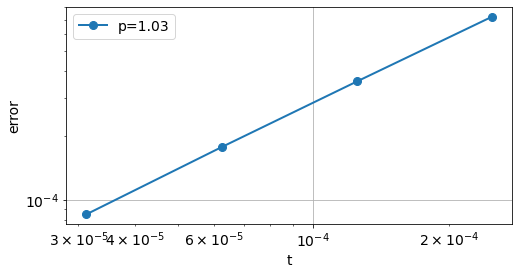

In [ ]:
plt.loglog(T,E,'o-', label='p={:.2f}'.format(p))
plt.grid('on')
plt.xlabel('t')
plt.ylabel('error')
plt.legend();